In [24]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('wine.csv')

# Explore dimensions
print(dataset.shape)   # Print the number of rows and columns


(1599, 12)


In [25]:
# Check for null values
print(dataset.isnull().sum())

# Identify categorical variables
categorical_vars = dataset.select_dtypes(include=['object']).columns
print(categorical_vars)

# Encode categorical variables (example using one-hot encoding)
encoded_dataset = pd.get_dummies(dataset, columns=categorical_vars)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Index(['quality'], dtype='object')


In [26]:
# Identify non-numerical columns
non_numerical_cols = dataset.select_dtypes(exclude=['int', 'float']).columns

# Convert non-numerical columns to numerical format
for col in non_numerical_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')


# # Check for null values
# print(dataset.isnull().sum())

# # Identify categorical variables
# categorical_vars = dataset.select_dtypes(include=['object']).columns
# print(categorical_vars)

# # Encode categorical variables (example using one-hot encoding)
# encoded_dataset = pd.get_dummies(dataset, columns=categorical_vars)


In [27]:
encoded_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bad,quality_good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0


In [28]:
# Assuming the target variable is named 'quality'
features = dataset.drop('quality', axis=1)
target = dataset['quality']

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test datasets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [31]:
import keras
from tensorflow.keras import layers

input_shape = X_train_scaled.shape[1]  # Number of features in the input data

model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
pip install --upgrade tensorflow keras


  Using cached tensorflow-2.13.0rc1-cp310-cp310-macosx_12_0_arm64.whl (2.0 kB)
  Using cached tensorflow_macos-2.13.0rc1-cp310-cp310-macosx_12_0_arm64.whl (189.3 MB)
  Attempting uninstall: tensorflow-macos
    Found existing installation: tensorflow-macos 2.13.0rc0
    Uninstalling tensorflow-macos-2.13.0rc0:
      Successfully uninstalled tensorflow-macos-2.13.0rc0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.13.0rc0
    Uninstalling tensorflow-2.13.0rc0:
      Successfully uninstalled tensorflow-2.13.0rc0
Note: you may need to restart the kernel to use updated packages.


In [36]:
# Define the batch size and number of epochs
batch_size = 32
epochs = 10

# Fit the model to the training data
history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_scaled, y_val))


Epoch 1/10
32/32 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 

In [37]:
# Get the model's parameters
model_params = []
for layer in model.layers:
    layer_params = layer.get_weights()
    model_params.append(layer_params)

# Print the parameters
for i, layer_params in enumerate(model_params):
    print(f"Layer {i+1} parameters:")
    for j, param in enumerate(layer_params):
        print(f"Weights {j+1} shape: {param[0].shape}")
        print(f"Biases {j+1} shape: {param[1].shape}")


Layer 1 parameters:
Weights 1 shape: (64,)
Biases 1 shape: (64,)
Weights 2 shape: ()
Biases 2 shape: ()
Layer 2 parameters:
Weights 1 shape: (64,)
Biases 1 shape: (64,)
Weights 2 shape: ()
Biases 2 shape: ()
Layer 3 parameters:
Weights 1 shape: (1,)
Biases 1 shape: (1,)
Weights 2 shape: ()


IndexError: index 1 is out of bounds for axis 0 with size 1

   loss  accuracy  val_loss  val_accuracy
0   NaN       0.0       NaN           0.0
1   NaN       0.0       NaN           0.0
2   NaN       0.0       NaN           0.0
3   NaN       0.0       NaN           0.0
4   NaN       0.0       NaN           0.0
5   NaN       0.0       NaN           0.0
6   NaN       0.0       NaN           0.0
7   NaN       0.0       NaN           0.0
8   NaN       0.0       NaN           0.0
9   NaN       0.0       NaN           0.0


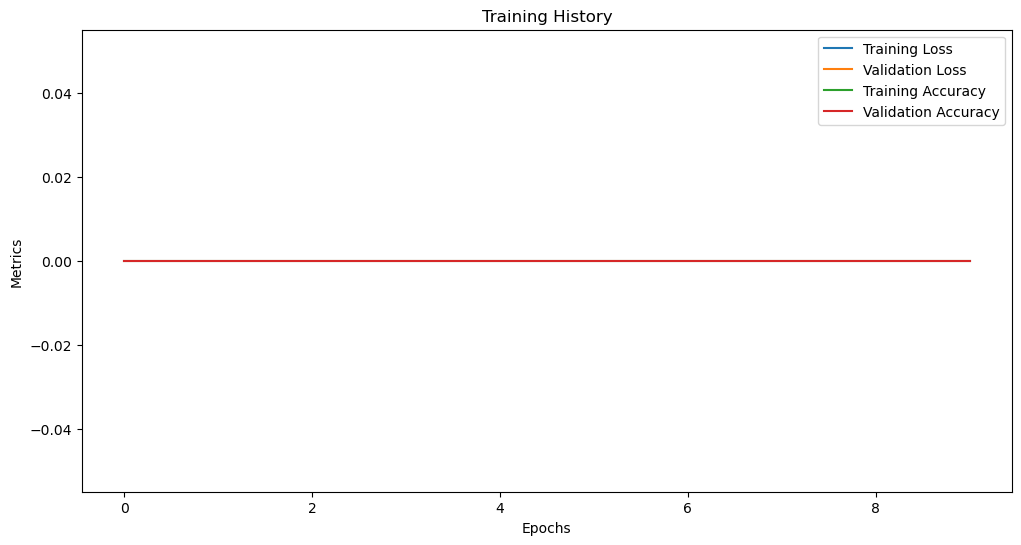

10/10 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Test Loss: nan
Test Accuracy: 0.0


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Store the model's training history as a DataFrame
history_df = pd.DataFrame(history.history)

# Print the training history
print(history_df)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training History')
plt.legend()
plt.show()

# Evaluate the model's performance using the test dataset
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
